In [5]:
def pydistance(x1,x2):
    return sum([(x1d-x2d)**2 for x1d,x2d in zip(x1,x2)])

def pynearest(u,X,Y,distance=pydistance):
    xbest = None
    ybest = None
    dbest = float('inf')
    for x,y in zip(X,Y):
        d = distance(u,x)
        if d < dbest:
            ybest = y
            xbest = x
            dbest = d
    return ybest

def pybatch(U,X,Y,nearest=pynearest,distance=pydistance):
    return [nearest(u,X,Y,distance=distance) for u in U]

In [9]:
import data
U,X,Y = data.toy(20,100,50)
print(pybatch(U,X,Y))


[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


In [11]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 90

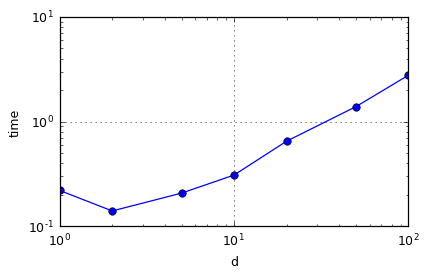

In [12]:
import time
# Values for the number of dimensions d to test
dlist = [1,2,5,10,20,50,100]
# Measure the computation time for each choice of number of dimensions d
tlist = []
for d in dlist:
    U,X,Y = data.toy(100,100,d)
    a = time.clock()
    pybatch(U,X,Y)
    b = time.clock()
    tlist += [b-a]
    
plt.figure(figsize=(5,3))
plt.plot(dlist,tlist,'-o')
plt.xscale('log');plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True)

In [39]:
import numpy
def npdistance(x1, x2):
    X1 = numpy.array(x1)
    X2 = numpy.array(x2)
    return numpy.sum((X1-X2)**2)
    #return(numpy.linalg.norm(x1 - x2))

# 

U,X,Y = data.toy(20,100,50)

npresult = pybatch(U,X,Y,nearest=pynearest,distance=npdistance)
pyresult = pybatch(U,X,Y,nearest=pynearest,distance=pydistance)

print('pybatch+pynearest+pydistance', pyresult)
print('pybatch+pynearest+npdistance', npresult)


('pybatch+pynearest+pydistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])
('pybatch+pynearest+npdistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])


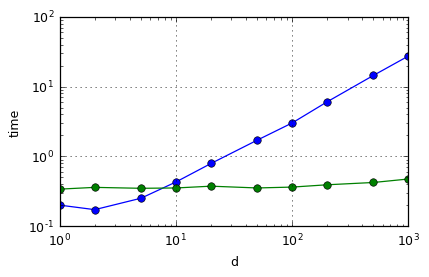

In [31]:
import time
# Values for the number of dimensions d to test
dlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
# Measure the computation time for each choice of number of dimensions d
pytlist = []
for d in dlist:
    U,X,Y = data.toy(100,100,d)
    py_a = time.clock()
    pybatch(U,X,Y,nearest=pynearest,distance=pydistance)
    py_b = time.clock()
    pytlist += [py_b-py_a]
    
nptlist = []
for d in dlist:
    U,X,Y = data.toy(100,100,d)
    np_a = time.clock()
    pybatch(U,X,Y,nearest=pynearest,distance=npdistance)
    np_b = time.clock()
    nptlist += [np_b-np_a]
    
plt.figure(figsize=(5,3))
plt.plot(dlist,pytlist,'-o', label='pybatch+pynearest+pydistance', color = 'blue')
plt.plot(dlist,nptlist,'-o', label='pybatch+pynearest+npdistance', color = 'green')                                              
plt.xscale('log');plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True)

In [23]:
U,X,Y = data.toy(20,100,50)
print(X.shape)
print(Y.shape)

(100L, 50L)
(100L,)


In [46]:
def npnearest(u,X,Y,distance=npdistance):
    #d = numpy.sum((X-u)**2,axis=1)
    #i = numpy.argmin(d)
    #return Y[i]
    distMat = X-u
    squarDistMat = distMat**2
    vecSquarDist = numpy.sum(squarDistMat,axis=1)
    indexMinDist = numpy.argmin(vecSquarDist)
    labelMinDist = Y[indexMinDist]
    return labelMinDist


U,X,Y = data.toy(20,100,50)

nplabel = pybatch(U,X,Y,nearest=npnearest,distance=npdistance)
pylabel = pybatch(U,X,Y,nearest=pynearest,distance=npdistance)


print('pybatch+pynearest+pydistance', pylabel)
print('pybatch+pynearest+npdistance', nplabel)

('pybatch+pynearest+pydistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])
('pybatch+pynearest+npdistance', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])


In [51]:
import time

nlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

pytlist = []
for n in nlist:
    U,X,Y = data.toy(100,n,100)
    py_a = time.clock()
    pybatch(U,X,Y,nearest=pynearest,distance=npdistance)
    py_b = time.clock()
    pytlist += [py_b-py_a]
    
nptlist = []
for n in dlist:
    U,X,Y = data.toy(100,n,100)
    np_a = time.clock()
    pybatch(U,X,Y,nearest=npnearest,distance=npdistance)
    np_b = time.clock()
    nptlist += [np_b-np_a]

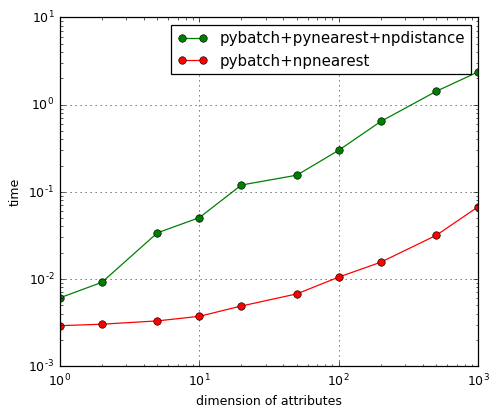

In [52]:
plt.figure(figsize=(6,5))
plt.plot(dlist,pytlist,'-o', label='pybatch+pynearest+npdistance', color = 'green')
plt.plot(dlist,nptlist,'-o', label='pybatch+npnearest', color = 'red')                                              
plt.xscale('log');plt.yscale('log'); plt.xlabel('dimension of attributes'); plt.ylabel('time'); plt.grid(True)
plt.legend()

In [66]:
import scipy
import scipy.spatial

def npbatch(U,X,Y):
    DistMatrix = scipy.spatial.distance.cdist(U,X)
    indexMinDist = numpy.argmin(DistMatrix, axis=1)
    labelMinDist = Y[indexMinDist]
    return labelMinDist

U,X,Y = data.toy(20,100,50)

nplabel = npbatch(U,X,Y)
pylabel = pybatch(U,X,Y,nearest=npnearest,distance=npdistance)

print('pybatch+npnearest', pylabel)
print('npbatch', nplabel)


('pybatch+npnearest', [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])
('npbatch', array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]))


In [67]:
import time

mlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

pytlist = []
for m in mlist:
    U,X,Y = data.toy(m,100,100)
    py_a = time.clock()
    pybatch(U,X,Y,nearest=npnearest,distance=npdistance)
    py_b = time.clock()
    pytlist += [py_b-py_a]
    
nptlist = []
for m in mlist:
    U,X,Y = data.toy(m,100,100)
    np_a = time.clock()
    npbatch(U,X,Y)
    np_b = time.clock()
    nptlist += [np_b-np_a]

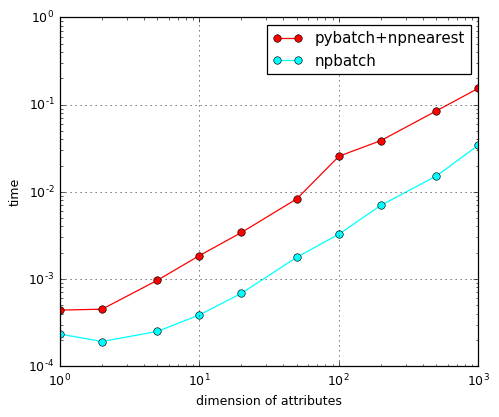

In [70]:
plt.figure(figsize=(6,5))
plt.plot(dlist,pytlist,'-o', label='pybatch+npnearest', color = 'red')
plt.plot(dlist,nptlist,'-o', label='npbatch', color = 'cyan')                                              
plt.xscale('log');plt.yscale('log'); plt.xlabel('dimension of attributes'); plt.ylabel('time'); plt.grid(True)
plt.legend()